In [87]:
import pandas

In [88]:
df = pandas.read_csv('transfusion.csv', index_col=0, header=0)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
id,,,,,
1,2,50,12500,98,1
2,0,13,3250,28,1
3,1,16,4000,35,1
4,2,20,5000,45,1
5,1,24,6000,77,0


# 数据前处理

In [89]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# 过滤数据列

In [90]:
## 选中所有行和列
df.iloc[:, :]
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
id,,,,,
1,2,50,12500,98,1
2,0,13,3250,28,1
3,1,16,4000,35,1
4,2,20,5000,45,1
5,1,24,6000,77,0


### 把字符型的 Yes 和 No 转换成1和0

In [91]:
#cat_var = ['class']

#for var in cat_var:
    #df[var] = df[var].map(lambda e: 0 if e == 'Iris-setosa' else 1 if e == 'Iris-versicolor' else 2 if e =='Iris-virginica' else 3) 
    

In [92]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
id,,,,,
1,2,50,12500,98,1
2,0,13,3250,28,1
3,1,16,4000,35,1
4,2,20,5000,45,1
5,1,24,6000,77,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 1 to 746
Data columns (total 5 columns):
Recency (months)                              746 non-null int64
Frequency (times)                             746 non-null int64
Monetary (c.c. blood)                         746 non-null int64
Time (months)                                 746 non-null int64
whether he/she donated blood in March 2007    746 non-null int64
dtypes: int64(5)
memory usage: 35.0 KB


## 把特征和目标分别读取出来

In [94]:
## 选中最后一行
y = df.iloc[:,-1]

## 选中第一行到最后一行
x = df.iloc[:,:-1]

In [95]:
y

id
1      1
2      1
3      1
4      1
5      0
      ..
742    0
743    0
744    0
745    0
746    0
Name: whether he/she donated blood in March 2007, Length: 746, dtype: int64

In [96]:
x

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
id,,,,
1,2,50,12500,98
2,0,13,3250,28
3,1,16,4000,35
4,2,20,5000,45
5,1,24,6000,77
...,...,...,...,...
742,16,3,750,86
743,23,2,500,38
744,21,2,500,52


In [97]:
x.shape

(746, 4)

# 区分训练与测试数据集

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [99]:
x_train.shape

(499, 4)

In [100]:
x_test.shape

(247, 4)

# 尺度标准化

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#x_train

# 训练 ANN

In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [103]:
def trainProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation='relu', input_dim = 4))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation='sigmoid'))
    
    classifier.compile(loss='binary_crossentropy', 
                      optimizer=optimizer,
                      metrics=['accuracy'])

    history = classifier.fit(x_train, y_train, 
                            batch_size=10, 
                            epochs=100, 
                            verbose=0,
                            validation_data=(x_test, y_test))
    
    return history

In [104]:
history1 = trainProcess('sgd')

In [105]:
history2 = trainProcess('RMSprop')

In [106]:
history3 = trainProcess('Adagrad')

In [107]:
history4 = trainProcess('Adadelta')

In [108]:
history5 = trainProcess('Adam')

# 评估优化器

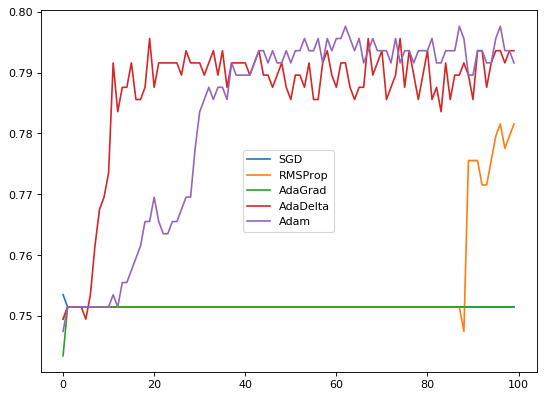

In [109]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['accuracy'], label='SGD')
plt.plot(history2.epoch, history2.history['accuracy'], label='RMSProp')
plt.plot(history3.epoch, history3.history['accuracy'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['accuracy'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['accuracy'], label='Adam')
plt.legend()
plt.show()

# ROV 曲线

In [110]:
y_pred = classifier.predict(x_test)

In [112]:
#y_pred

predicted = (y_pred > 0.5).flatten().astype(int)

In [114]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted)

ValueError: Found input variables with inconsistent numbers of samples: [247, 988]